In [1]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, AutoencoderKL
import torch
import datetime


/Users/umedayuusuke/workspace/Diffuser/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
vae = AutoencoderKL.from_pretrained("./model/counterfeit_vae")

In [3]:
pipe = StableDiffusionPipeline.from_ckpt(
    "./model/checkpoint/Counterfeit-V3.0.safetensors",
)

global_step key not found in model
In this conversion only the non-EMA weights are extracted. If you want to instead extract the EMA weights (usually better for inference), please make sure to add the `--extract_ema` flag.


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.3.layer_norm2.bias', 'vision_model.encoder.layers.10.mlp.fc1.weight', 'vision_model.encoder.layers.0.layer_norm2.weight', 'vision_model.encoder.layers.11.layer_norm1.weight', 'vision_model.encoder.layers.1.self_attn.q_proj.weight', 'vision_model.encoder.layers.21.layer_norm2.weight', 'vision_model.encoder.layers.20.self_attn.k_proj.bias', 'vision_model.encoder.layers.6.self_attn.q_proj.bias', 'vision_model.encoder.layers.21.mlp.fc1.weight', 'vision_model.encoder.layers.22.mlp.fc2.bias', 'vision_model.encoder.layers.8.self_attn.v_proj.bias', 'vision_model.encoder.layers.18.layer_norm1.bias', 'vision_model.encoder.layers.7.mlp.fc2.weight', 'vision_model.encoder.layers.17.self_attn.k_proj.bias', 'vision_model.encoder.layers.16.self_attn.q_proj.weight', 'vision_model.encoder.layers.3.layer_norm1.bias', 'vision_model.encoder.layers.3.self_attn.ou

In [4]:
pipe.load_textual_inversion("./model/embeddings/EasyNegativeV2.safetensors", weight_name="EasyNegativeV2.safetensors", token="EasyNegativeV2")

The loaded token: emb_params is overwritten by the passed token EasyNegativeV2.


In [5]:
pipe.load_textual_inversion("./model/embeddings/negative_hand-neg.pt", weight_name="negative_hand-neg.pt", token="negative_hand-neg")

The loaded token: negative_hand is overwritten by the passed token negative_hand-neg.


In [6]:
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

In [15]:
pipe.vae = vae.to(pipe.device)

In [18]:
def null_safety(images, **kwargs):
	return images, False

pipe.safety_checker = null_safety

In [32]:
# cuda用
# pipe.enable_xformers_memory_efficient_attention()
# RAMが64GB未満の場合に推奨
pipe.enable_attention_slicing()

In [33]:
pipe = pipe.to("mps")

In [36]:
prompt = "(masterpiece, best quality),(((from below, depth of field, dutch angle, green lighting))), floating hair, 1girl, solo, formal, hand in pocket, suit, black gloves, building, looking at viewer, black necktie, fingerless gloves, white shirt, city, outdoors, black jacket, belt, black pants, collared shirt, brown eyes, standing, long sleeves, grey hair, cityscape, open jacket, cowboy shot, skyscraper, black suit, night, pant suit, very long hair"
negative_prompt = "EasyNegativeV2, negative_hand-neg,(worst quality:1.4), (low quality:1.4), (monochrome:1.1),text,watermark"

generator = torch.Generator(device="mps").manual_seed(0)

image = pipe(
    prompt, 
    negative_prompt=negative_prompt, 
    num_inference_steps=25,
    generator=generator,
    guidance_scale=10,
    # width=512,
    # height=512,
    ).images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['red shirt, brown eyes, standing, long sleeves, grey hair, cityscape, open jacket, cowboy shot, skyscraper, black suit, night, pant suit, very long hair']
 96%|█████████▌| 24/25 [00:51<00:01,  1.30s/it]

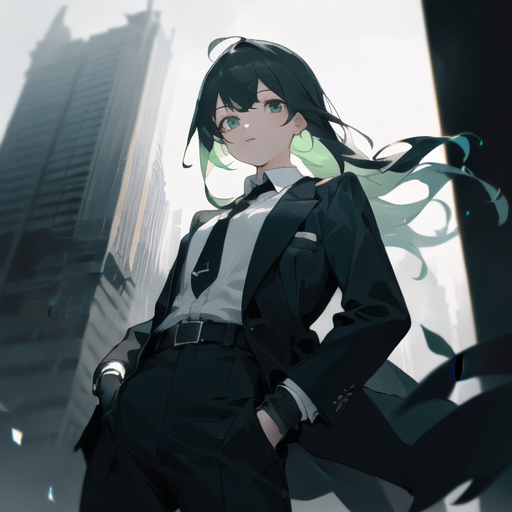

In [30]:
image

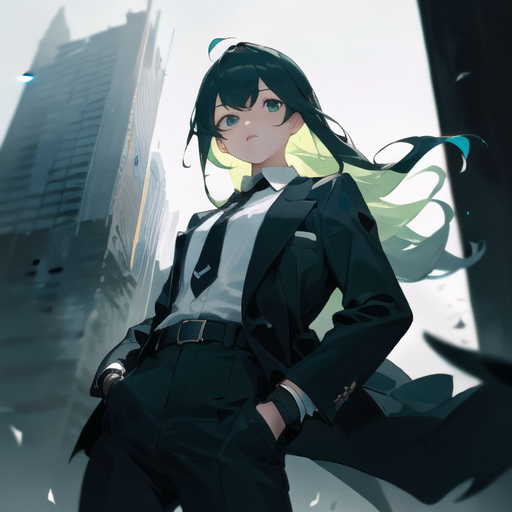

In [ ]:
image